# Crop Production Prediction

#### Problem Statement
The Agriculture business domain, as a vital part of the overall supply chain, is expected to highly evolve in the upcoming years via the developments, which are taking place on the side of the Future Internet. This paper presents a novel Business-to-Business collaboration platform from the agri-food sector perspective, which aims to facilitate the collaboration of numerous stakeholders belonging to associated business domains, in an effective and flexible manner.This dataset provides a huge amount of information on crop production in India ranging from several years. Based on the Information the ultimate goal would be to
predict crop production and find important insights highlighting key indicators and metrics that influence crop production.

#### Approach
The main goal of the project is to find key metrics and factors and then show meaningful relationships between them based on different features available in the dataset.

Data Collection : Imported data from various datasets available in the project using Pandas library.

Data Cleaning : Removed missing values and created new features as per insights.

Data Preprocessing : Modified the structure of data in order to make it more understandable and suitable and convenient for statistical analysis.

Data Analysis : I started analyzing dataset using Pandas,Numpy,Matplotlib and Seaborn.

Data Visualization : Plotted graphs to get insights about dependent and independent variables. Also used Tableau for data visulization.

In [305]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [306]:
data=pd.read_csv('C:/Users/Sreya Raj/Downloads/Crop Production data.csv')
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [307]:
data.shape

(246091, 7)

In [308]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [310]:
data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [311]:
data.select_dtypes(exclude = ['object']).describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [312]:
data.select_dtypes(include = ['object']).describe()

,State_Name,District_Name,Season,Crop
count,246091,246091,246091,246091
unique,33,646,6,124
top,Uttar Pradesh,BIJAPUR,Kharif,Rice
freq,33306,945,95951,15104


* The dataset has 246091 rows and 7 columns.
* Among the features 3 are numeric and others are categorical

## Data Cleaning

In [313]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

There are null values in Production variable.

In [314]:
data=data.dropna()
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [315]:
data.shape

(242361, 7)

In [316]:
#Checking Duplicates
data.duplicated().sum()

0

There is no duplicate values 

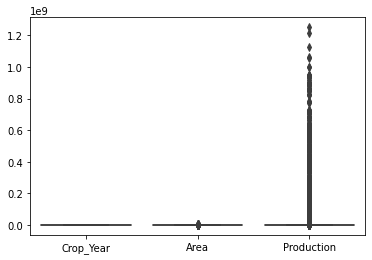

In [317]:
#checking outliers
sns.boxplot(data = data.select_dtypes(exclude = 'object'))
plt.show()

In [318]:
# define continuous variable & plot
continous_features = ['Area','Production']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(data[continous_features])

For the feature Area, No of Outliers is 39930
For the feature Production, No of Outliers is 42390


In [319]:
from scipy.stats.mstats import winsorize

# Specify the columns you want to winsorize
cols_to_winsorize = ['Area', 'Production']

# Define the winsorization limits for each column
winsorize_limits = {
    'Area': [0.05, 0.2] ,
    'Production': [0.05, 0.2] 
}

# Apply winsorization to the specified columns
for col in cols_to_winsorize:
    data[col] = winsorize(data[col], limits=winsorize_limits[col])


C:\Users\Sreya Raj\AppData\Local\Temp\ipykernel_12220\3108711892.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = winsorize(data[col], limits=winsorize_limits[col])


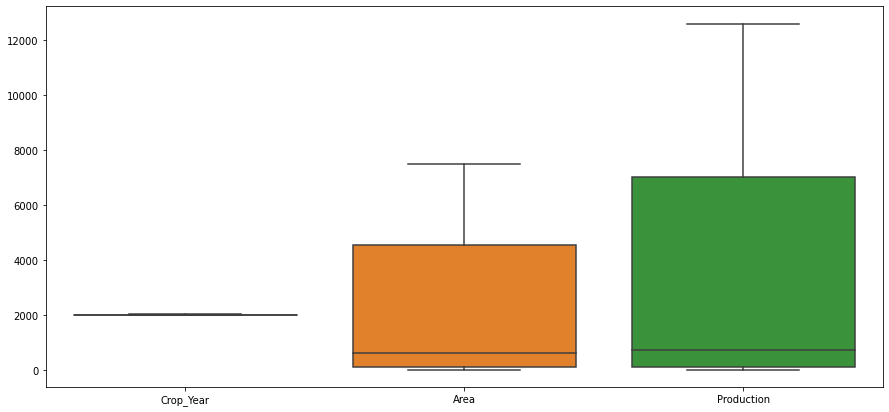

In [320]:
plt.figure(figsize = (15,7))
sns.boxplot(data = data.select_dtypes(exclude = 'object'))
plt.show()

# EDA

## Univariate Analysis

In [321]:
data['Crop_Year'].value_counts()

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64

The dataset gives the information of crop production from 2003 to 2015.Crop production is more in 2003 and it decreases as years passes and crop production is least in 2015.

In [322]:
data['State_Name'].value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

Data shows the total crop production in different Indian states and union territories. Uttar Pradesh has the highest production, followed by Madhya Pradesh and Karnataka & Chandigarh has lowest. These figures highlight the significant role of these regions in India's agricultural output.

In [323]:
data['Season'].value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

In the dataset, the majority of crops are grown during the "Kharif" season, with "Rabi" and "Whole Year" seasons also contributing significantly to crop production. "Summer" and "Winter" seasons have comparatively lower crop production, while "Autumn" ranks lowest. Understanding these seasonal patterns is essential for agricultural planning and decision-making.

In [324]:
data['Crop'].value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

Almost 124 types of crops are cultivated."Rice" stands out as the most widely cultivated crop, followed by "Maize" and "Moong (Green Gram)."

## Bivariate Analysis

In [325]:
a=data.groupby(['State_Name'])[['Area','Production']].sum()
a = a.sort_values(by='Area', ascending=True)
print(a)

                                    Area    Production
State_Name                                            
Chandigarh                      12539.00  6.396300e+04
Andaman and Nicobar Islands    246797.88  5.397439e+05
Dadra and Nagar Haveli         302374.00  5.745100e+05
Puducherry                     488806.00  2.113037e+06
Goa                            625893.40  1.271419e+06
Mizoram                        776410.17  1.220835e+06
Tripura                        952030.00  2.430745e+06
Manipur                       1077108.00  2.422661e+06
Sikkim                        1228554.00  1.787620e+06
Jharkhand                     2956180.75  4.777969e+06
Jammu and Kashmir             3206048.00  4.192196e+06
Meghalaya                     3207205.00  7.331032e+06
Himachal Pradesh              3338652.00  5.720640e+06
Arunachal Pradesh             3546076.00  5.978261e+06
Nagaland                      4175188.00  8.238452e+06
Uttarakhand                   7841239.00  1.344504e+07
Punjab    

Highest area of crop production is in Uttar Pradesh.

In [326]:
c=data.groupby(['District_Name'])[['Area','Production']].sum()
c=c.sort_values(by='Area')
c

,Area,Production
District_Name,,
MUMBAI,5.0,3.00
NAMSAI,119.0,794.00
RAMGARH,1669.0,5472.00
KHUNTI,1718.0,5024.00
HYDERABAD,1953.0,3835.00
...,...,...
CHITRADURGA,2789914.0,3757879.02
AURANGABAD,2794944.0,3947530.00
BELLARY,2835484.0,4155562.28


Crop production is more in the district Belgaum

In [327]:
b=data.groupby(['Season'])[['Area','Production']].sum()
b=b.sort_values(by="Area")
b

,Area,Production
Season,,
Autumn,1.652366e+07,2.481310e+07
Winter,2.107375e+07,3.550465e+07
Summer,2.500796e+07,4.147285e+07
Whole Year,8.141457e+07,2.149475e+08
Rabi,1.679379e+08,2.437674e+08
Kharif,2.540532e+08,3.465239e+08


Kharif is the season in which crop production is more.

In [328]:
d=data.groupby(['Crop_Year'])[['Area','Production']].sum()
d=d.sort_values(by='Area')
d

,Area,Production
Crop_Year,,
2015,883613.00,1320486.90
2014,22734596.52,38901777.06
1997,27457227.00,41887992.00
2013,28442230.00,49507953.69
2012,28690259.00,49017030.22
2007,30745021.88,50241298.99
2011,31132511.82,52336411.79
1998,31220974.00,47919298.00
2009,31897040.00,50914854.10


Highest crop production was in the year 2003 and then it deceeases.

In [329]:
e=data.groupby(['Crop'])[['Area','Production']].sum()
e=e.sort_values(by='Production')
e

,Area,Production
Crop,,
Other Dry Fruit,7.00,3.000000e+00
Apple,20.00,1.200000e+01
Peach,48.00,1.200000e+01
Litchi,39.00,1.800000e+01
Pear,2680.00,1.800000e+01
...,...,...
Potato,13404001.67,4.748950e+07
Maize,40175039.31,6.983126e+07
Wheat,43216433.44,7.123313e+07


Rice is the most cultivated crop.

### Multivariate Analysis

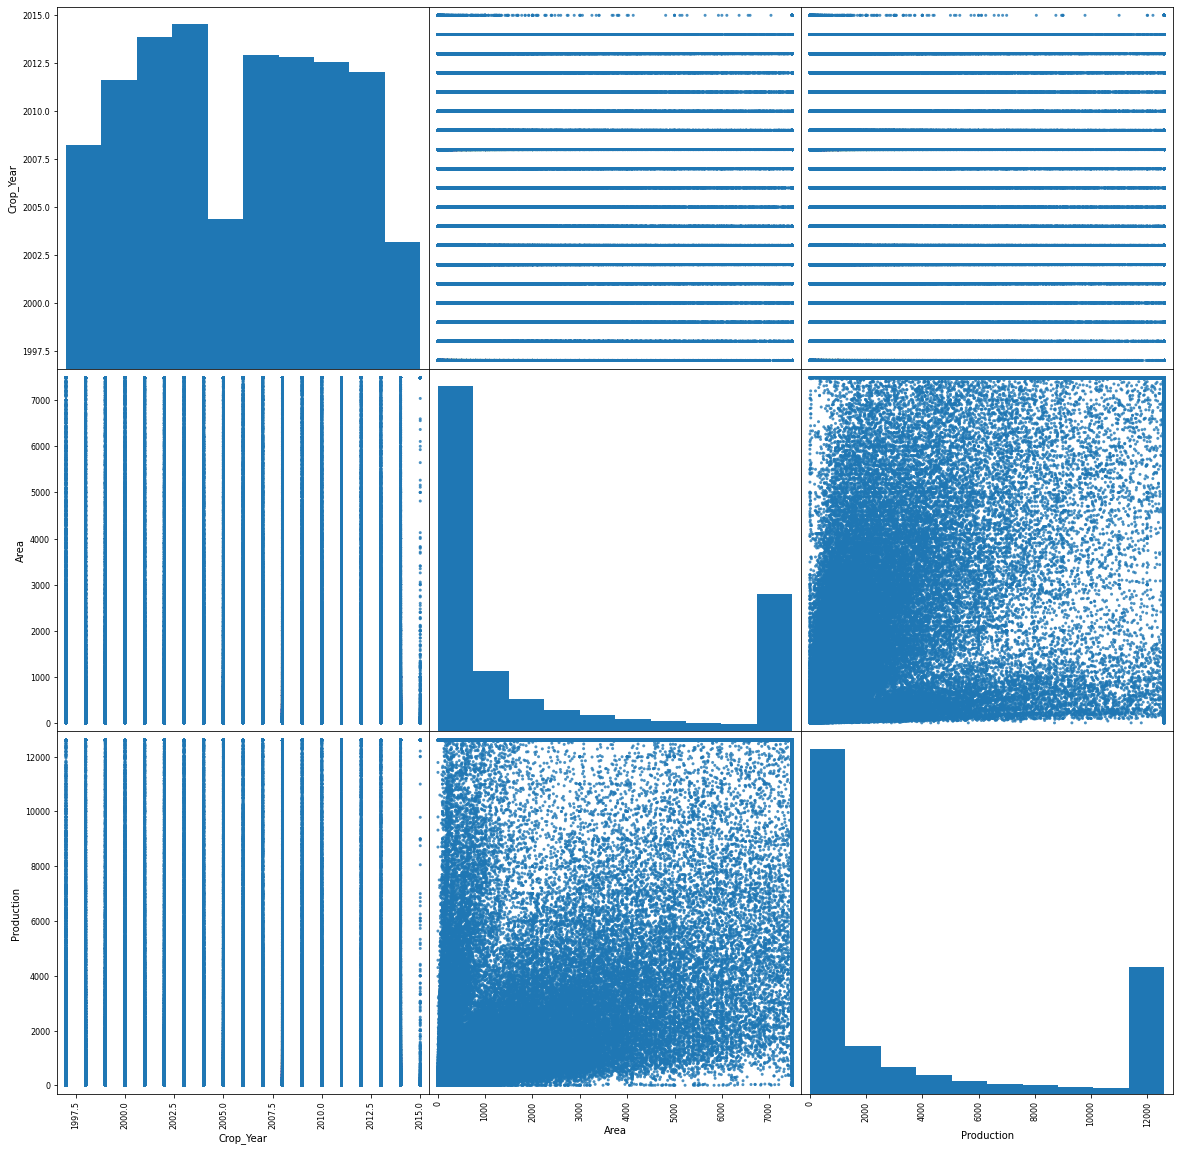

In [330]:
# Create a scatterplot matrix for all columns
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20, 20), alpha=0.8, diagonal='hist')
plt.show()

<AxesSubplot:>

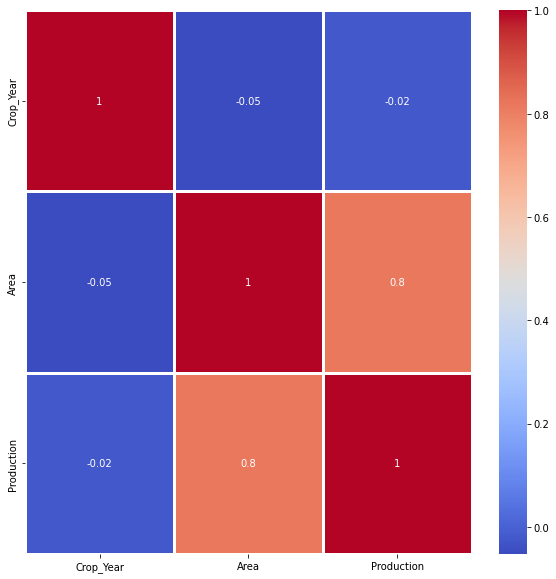

In [331]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True,linewidths = 3,fmt = '.1g',cmap = 'coolwarm')

* There is high positive correlation between area and production.
* There is negative correlation between crop year and production.As year increases crop production decreases.

### INFERENCE

* The dataset gives the information of crop production from 2003 to 2015
* Highest area of crop production is in Uttar Pradesh.
* Crop production is more in the district Belgaum
* Kharif is the season in which crop production is more.
* Highest crop production was in the year 2003 and then it deceeases.
* Almost 124 types of crops Rice is the most cultivated crop.